In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
scenario1 = [i for i in os.listdir('/Users/kpierce/SEIR_Example/outputs/scenario_1/') if 'results' in i]

In [18]:
scenario1

['results_9.csv',
 'results_8.csv',
 'results_6.csv',
 'results_7.csv',
 'results_5.csv',
 'results_4.csv',
 'results_1.csv',
 'results_3.csv',
 'results_2.csv',
 'results_10.csv']

In [32]:
all_results = []
for s1 in scenario1:
    df = pd.read_csv(os.path.join('/Users/kpierce/SEIR_Example/outputs/scenario_1/', s1))
    all_results.append(df)
all_results_df = pd.DataFrame(pd.concat(all_results))

In [26]:
all_results_df.head()

,sim_index,time,susceptible,exposed,infected,recovered
0,9,0,10000.000000,7.000000,3.000000,0.000000
1,9,1,9999.940060,6.709940,3.290000,0.060000
2,9,2,9999.814386,6.500117,3.559697,0.125800
3,9,3,9999.617591,6.371907,3.813509,0.196994
4,9,4,9999.344604,6.326298,4.055834,0.273264


In [33]:
all_results_df.columns = ['sim_index', 'time', 'susceptible', 'exposed', 'infected', 'recovered']

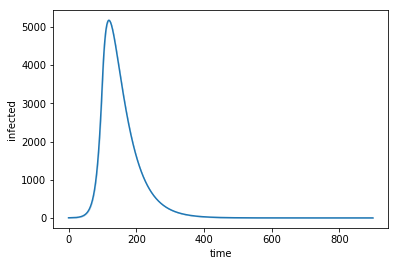

In [35]:
ax = sns.lineplot(x=all_results_df["time"], y=all_results_df["infected"], data=all_results_df)